<a href="https://colab.research.google.com/github/cristianomg10/uniasselvi-projeto-1/blob/etapa2/Projeto_I_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

**Estudante**: Cristiano M. Garcia (Matrícula: 2874011)

**Curso**: Big Data e Inteligência Analítica




## Introdução e Fundamentação Teórica



### Definição do Tema
A análise de sentimentos constitui uma tarefa fundamental para empresas e instituições que querem fazer um acompanhamento mais preciso em relação à opinião sobre seus produtos/serviços. Muitas vezes, a avaliação categórica por parte do usuário (por exemplo, em sites que permitem a avaliação pelo número de estrelas, de 1 a 5) pode ser enganosa. Com frequência, pode-se encontrar informações conflitantes, em que o texto tem um sentimento e a avaliação, um "sentimento" oposto. Por exemplo: "Amei", categorizado em 1 estrela. Desta forma, quando possível, uma avaliação considerando o texto fornecido na avaliação pode fornecer informações mais precisas sobre a opinião em relação ao produto.



### Objetivo
Neste projeto, será realizado a geração de um modelo de classificação utilizando o conjunto de dados de **IMDB Movie Rating**. Para ser mais específico, a ideia é realizar uma análise de sentimentos, ou seja, de acordo com o texto, o modelo deverá retornar **0 ou 1**, sendo 0 para negativo e 1, positivo.



### Especificação Técnica
O conjunto de dados está no formato _.csv_ e é relativamente simples, contendo apenas 2 colunas:
* **text**, correspondendo ao texto digitado na review;
* **label**, que corresponde ao sentimento em si (0 - negativo, 1 - positivo)

Este conjunto de dados foi obtido no [Kaggle](https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis). Ele contém 39723 registros e está balanceado quase em 50%/50%, sendo 20019 registros negativos e 19981 registros positivos. Esse balanceamento já é de grande ajuda para os algoritmos de aprendizado de máquina, pois dados desbalanceados costumam confundir até mesmo a avaliação de performance.

Serão utilizados os algoritmos Regressão Logística, KNN, Floresta Aleatória e (Long Short Term Memory) LSTM.



#### Pré-processamento
A base será pré-processada, removendo pontuação, convertendo todos os números para um único número, todas as palavras serão convertidas para minúsculo.

Haverá algumas diferenças:
1. Para abordagens rasas (Regressão Logística, KNN e Floresta Aleatória), será utilizado Lemmatização e Stemming (não simultaneamente) para padronização das palavras. Além disso, as stopwords serão removidas. Será utilizando ainda transformação para Bag-of-Words e TF-IDF;
2. Para a abordagem _deep_ (LSTM), não haverá o pré-processamento mencionado no item 1, pois as mesmas não são utilizados com _Deep Learning_.



#### Tarefa de Aprendizado de Máquina
A tarefa de Aprendizado de Máquina adequada para este trabalho é a **classificação**.



#### Avaliação 

Os algoritmos serão avaliados em termos de acurácia, precisão, revocação e F1-score, sendo estas métricas adequadas para tarefas de **classificação**.



### Trabalhos Relacionados

Pesquisando alguns trabalhos relacionados, como o trabalho [1], que utilizou o mesmo dataset em uma versão mais antiga, com 40000 registros, abordagens de *Deep Learning* foram testadas (CNN, LSTM e a combinação de ambos), sendo a combinação a única a ultrapassar 90% de Precisão e pouco mais de 85% de F1-Score. Outro trabalho [2] comparou SVM, Maximum Entropy, Naïve Bayes e KNN, sendo a abordagem mais performática o Maximum Entropy. Já o trabalho [3] utilizou combinações de componentes de *Deep Learning* para gerar diferentes arquiteturas, em que alcançou um resultado de acurácia de 89.5%. Vários outros trabalhos podem ser encontrados na Literatura.

Conhecer alguns trabalhos relacionados ajuda na definição de um *baseline* e em um posicionamento das expectativas a serem alcançadas. Neste sentido, o único trabalho dos 3 acima que utilizou abordagens não-Deep (*shallow*) foi o [1], em que Naïve Bayes atingiu quase 90% de acurácia e SVM ficou próximo de 75%.



## Referências (deveria estar no fim mas acho que não tem problema)

[1] REHMAN, Anwar Ur et al. A hybrid CNN-LSTM model for improving accuracy of movie reviews sentiment analysis. Multimedia Tools and Applications, v. 78, n. 18, p. 26597-26613, 2019.

[2] KUMAR, H. M.; HARISH, B. S.; DARSHAN, H. K. Sentiment Analysis on IMDb Movie Reviews Using Hybrid Feature Extraction Method. International Journal of Interactive Multimedia & Artificial Intelligence, v. 5, n. 5, 2019.

[3] YENTER, Alec; VERMA, Abhishek. Deep CNN-LSTM with combined kernels from multiple branches for IMDb review sentiment analysis. In: 2017 IEEE 8th Annual Ubiquitous Computing, Electronics and Mobile Communication Conference (UEMCON). IEEE, 2017. p. 540-546.

## Metodologia

A Metodologia seguirá os seguintes passos, conforme já mencionado acima:
* Pré-processamento;
* Treinamento dos modelos de aprendizado de máquina;
* Avaliação

Como pré-processamento para o uso de Naïve Bayes, Floresta Aleatória e KNN, será realizado o seguinte pré-processamento. 

* Remoção de pontuação;
* Conversão para lowercase (minúsculo);
* Remoção de stopwords;
* Uso de stemming;
* Conversão de números para um único número;
* Aplicação de BagOfWords e TF-IDF;
* Aplicaçao de PCA.

Os métodos serão executados 5 vezes cada, com diferentes random_state

## Etapa 2

### Conexão com a base de dados (Carregamento dos dados)

In [1]:
!unzip "/content/drive/MyDrive/Datasets/imdb.zip"

Archive:  /content/drive/MyDrive/Datasets/imdb.zip
  inflating: movie.csv               


In [2]:
import pandas as pd

df = pd.read_csv("movie.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


### Exibição de trechos de dados (Análise exploratória)

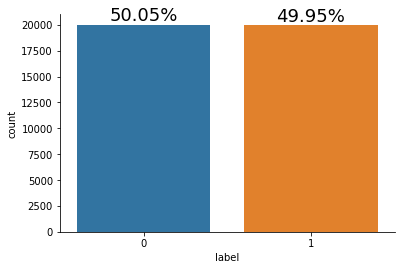

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x="label")

# remover os riscos que atrapalham a visualização das porcentagens
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# agrupado para capturar as porcentagens
group = df.groupby(by=['label']).count().unstack(fill_value=0).reset_index()
group.rename({0: 'count'}, axis=1, inplace=True)

for index, row in group.iterrows():
    ax.text(index, row['count'], f"{(row['count'] / len(df) * 100):.2f}%", color='black', ha="center", va="bottom", fontsize=18);

Como dito anteriormente, o conjunto de dados é quase balanceado em 50%/50%, sendo um pouco de mais *reviews* negativos que positivos.

Vamos ver alguns exemplos de *reviews* negativos e *reviews* positivos.

In [4]:
df[ df['label'] == 0 ]['text'].sample(5).values # negativos

array(["I don't usually like TV movies, I reckon that if the thing was any good it would make it to Hollywood. This one though is better than average, pretty high production values, a few interesting story twists and some nice shots of NYC (along with Toronto) hold the interest.",
       "The Mad Monster starts in Dr. Lorenzo Cameron's (George Zucco) laboratory as he perfects his discovery of how to turn a human being into a vicious wolf like monster by injecting animal blood into a human subject who happens to be his dim-witted servant Petro (Glenn Strange), apparently he plans to put the serum at the disposal of the war department who will use it to create an unstoppable army of these monsters, the ultimate soldier! However, first things first as Dr. Cameron has his sights set on some sweet revenge on the people who dismissed his experiments, forced him to resign & subjected him to public ridicule. Dr. Cameron puts his plan into action & uses his monstrous creation to murder Professo

In [5]:
df[ df['label'] == 1 ]['text'].sample(5).values # positivos

array(['Elia Kazan, one of the best theater directors this country ever had, showed he was equally at home with movies. With "Panic in the Streets", Mr. Kazan gives us an early version of what would come later, with perhaps his master piece, "On the Waterfront", although both movies share only the water setting, for they are different visions about different subjects.<br /><br />Mr. Kazan shot on location in New Orleans. The adaptation by Daniel Fuchs of the Edna and Edward Anhalt stories that are the basis of the film, is remarkable in that it takes us to places that no tourist dared to see when visiting "The Big Easy". One of the big assets of this film is the magnificent black and white cinematography by Joseph MacDonald that shows New Orleans at its best. Also the music by Alfred Newman and the song by Billie Holiday gives the proceedings a nice touch.<br /><br />This film, could have been shot in New York, or another Northern big city because it presents us with characters that sp

Vamos avaliar, de curiosidade, o tamanho médio dos *reviews* em termos de palavras por classe.

In [6]:
def conta_palavras(x):
    return len(x.split(" "))

df['numero_palavras'] = df['text'].apply(conta_palavras)
medias = df[['label', 'numero_palavras']].groupby(by=['label']).mean()
desvios = df[['label', 'numero_palavras']].groupby(by=['label']).std()

for media, desvio, indice in zip(medias.values.flatten(), desvios.values.flatten(), list(medias.index)):
    print(f"Classe: {indice} -> número de palavras: {media} +/- {desvio}")

Classe: 0 -> número de palavras: 229.19516459363604 +/- 164.31668858598493
Classe: 1 -> número de palavras: 233.46684350132625 +/- 177.7660866018509


Com a informação acima, pode-se perceber que **as postagens positivas de reviews para filmes tendem a ser mais detalhadas, pois tanto a média quanto o desvio padrão são ligeiramente maiores que nas postagens negativas**.

### Pré-processamento

Conforme definido na Metodologia, os métodos a serem utilizados são:
* Remoção de pontuação;
* Conversão para lowercase (minúsculo);
* Remoção de stopwords;
* Aplicação de stemming.
* Conversão de números para um único número;
* Aplicação de BagOfWords e TF-IDF;
* Aplicaçao de PCA

In [7]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Remove a pontuação
def remove_pontuacao(x):
    return x.translate(str.maketrans('', '', string.punctuation))

# Lower -> converte todo o texto para minúsculo
def converte_minusculo(x):
    return x.lower()

# Remove as palavras desnecessárias
def remove_stopwords(x):
    import re
    sem_stopwords =  " ".join([a for a in word_tokenize(x) if a not in stopwords])
    return re.sub('[ ]{1,}', ' ', sem_stopwords)

# Converte números para um único número (0, neste caso.)
def converte_numeros(x):
    import re
    return re.sub('[0-9]{1,}', '0', x)

def stem(x):
    ps = PorterStemmer()
    stemmed =  " ".join([ps.stem(a) for a in word_tokenize(x)])
    return stemmed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Aplicaremos os métodos acima descritos pois manter estas informações podem tornar ainda mais complexo ao modelo aprender a diferenciar um *review* positivo de um negativo.

Stopwords são palavras "genéricas" que não ajudam o modelo a fazer a classificação de fato pois existem em todas as situações. Envolvem pronomes, verbos, entre outras palavras.

Pontuação, ao ser usada como feature, terá o mesmo efeito de stopwords. 

A aplicação de Stemming é necessária para redução de palavras similares à sua raiz, como na imagem a seguir:
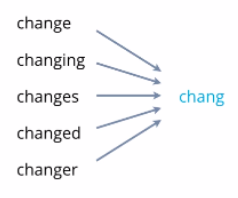

Todos os números foram convertidos para o mesmo número, pois eles podem criar uma tendência incorreta na classificação.



In [8]:
df['text'] = df['text'].apply(lambda x: converte_numeros(converte_minusculo(remove_pontuacao(x))))
df.head()

,text,label,numero_palavras
0,i grew up b 0 watching and loving the thunderb...,0,151
1,when i put this movie in my dvd player and sat...,0,326
2,why do people who do not know what a particula...,0,184
3,even though i have great interest in biblical ...,0,69
4,im a die hard dads army fan and nothing will e...,1,178


In [9]:
df['text'] = df['text'].apply(lambda x: converte_minusculo(x))

In [10]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [11]:
df['text'] = df['text'].apply(lambda x: stem(x))

In [12]:
df.head()

,text,label,numero_palavras
0,grew b 0 watch love thunderbird mate school wa...,0,151
1,put movi dvd player sat coke chip expect hope ...,0,326
2,peopl know particular time past like feel need...,0,184
3,even though great interest biblic movi bore de...,0,69
4,im die hard dad armi fan noth ever chang got t...,1,178


### Separação em treino e teste

Este tipo de separação é necessário para evitar viés no modelo. Além disso, deve ser executado nesse ponto para não haver *data leakage* dos dados de teste, o que invalidaria os resultados obtidos com o modelo.

Separaremos inicialmente em 70/30, ou seja: 70% para treino e 30% para teste.

In [13]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(df['text'], df['label'], random_state=0, stratify=df['label'],
                                                    test_size=.3)

### Aplicação de Bag-Of-Words

Bag-of-Words simplesmente conta a frequência de palavras por review. Utilizaremos o fit_transform e realizaremos apenas o transform nos dados de teste, para evitar que algum tipo de parâmetro vaze e afete o modelo de alguma forma.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Xtreino_bow = vectorizer.fit_transform(Xtreino)
Xteste_bow = vectorizer.transform(Xteste)

### Aplicação de TF-IDF

Gerando um novo dataframe com dados com o TF-IDF calculado.
O TF-IDF (Term-frequency - Inverse Document Frequency) é um cálculo que avalia relevância de determinadas palavras, dando valores baixos para palavras frequentes em muitos documentos (ou reviews, neste caso), que se comportaria de forma similar a uma stopword.

O cálculo é realizado da seguinte forma:
$w_{ij} = tf_{ij} \times log(\frac{N}{df_i})$, onde $w_{ij}$ é a palavra $i$ no *review* $j$, $tf_{ij}$ é a frequência da palavra $i$ no review $j$, que se multiplica à $log(\frac{N}{df_i})$. $N$ é o número total de reviews e $df_i$ é o número de reviews que contêm a palavra $i$. O cálculo de log suaviza o crescimento do valor de $w_{ij}$.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
Xtreino_tfidf = tfidf.fit_transform(Xtreino)
Xteste_tfidf = tfidf.transform(Xteste)

### Classificação

Serão utilizados Naïve Bayes, KNN e Floresta Aleatória.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Será executado cada abordagem 5 vezes, com exceção do GaussianNB. O GaussianNB possui paâmetros apenas como probabilidades a priori e var_smoothing, utilizado para estabilidade em alguns cálculos.

In [17]:
resultados = {'abordagem': [], 'preprocessamento':[], 'acc_teste': [], 'parametro':[]}

Execução 5 vezes para RandomForest, variando a quantidade de árvores de 1 a 50, pulado de 10 em 10, utilizando pré-processamento com Bag-of-Words. Os parâmetros selecionados serão aqueles que obtiverem melhor resultado no teste.

In [18]:
from sklearn.metrics import accuracy_score

acc_rf_treino = {}
acc_rf_teste = {}

for numero_arvores in range(1, 52, 10):
    print(f"Treinando RandomForest com {numero_arvores} estimators.")
    acc_rf_treino[numero_arvores] = []
    acc_rf_teste[numero_arvores] = []

    for rs in range(0, 5):
        rf = RandomForestClassifier(random_state=rs, n_estimators=numero_arvores)
        rf.fit(Xtreino_bow, ytreino)
    
        acc_rf_treino[numero_arvores].append(accuracy_score(ytreino, rf.predict(Xtreino_bow)))
        acc_rf_teste[numero_arvores].append(accuracy_score(yteste, rf.predict(Xteste_bow)))
    
df_rf_treino = pd.DataFrame(acc_rf_treino)
df_rf_teste = pd.DataFrame(acc_rf_teste)

 
resultados['abordagem'].append('rf')
resultados['preprocessamento'].append('bow')
resultados['acc_teste'].append(df_rf_teste.mean().max())
resultados['parametro'].append(df_rf_teste.mean()[df_rf_teste.mean()==df_rf_teste.mean().max()].index[0])

Treinando RandomForest com 1 estimators.
Treinando RandomForest com 11 estimators.
Treinando RandomForest com 21 estimators.
Treinando RandomForest com 31 estimators.
Treinando RandomForest com 41 estimators.
Treinando RandomForest com 51 estimators.


Execução 5 vezes para KNN, variando a quantidade de vizinhos a serem consultados de 1 a 50, pulado de 10 em 10, utilizando pré-processamento com Bag-of-Words. Os parâmetros selecionados serão aqueles que obtiverem melhor resultado no teste.

In [19]:
from sklearn.metrics import accuracy_score

acc_knn_treino = {}
acc_knn_teste = {}

for k in range(1, 52, 10):
    print(f"Treinando KNN com {k} vizinhos.")
    acc_knn_treino[k] = []
    acc_knn_teste[k] = []

    for rs in range(0, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xtreino_bow, ytreino)
    
        acc_knn_treino[k].append(accuracy_score(ytreino, knn.predict(Xtreino_bow)))
        acc_knn_teste[k].append(accuracy_score(yteste, knn.predict(Xteste_bow)))
    
df_knn_treino = pd.DataFrame(acc_knn_treino)
df_knn_teste = pd.DataFrame(acc_knn_teste)

 
resultados['abordagem'].append('knn')
resultados['preprocessamento'].append('bow')
resultados['acc_teste'].append(df_knn_teste.mean().max())
resultados['parametro'].append(df_knn_teste.mean()[df_knn_teste.mean()==df_knn_teste.mean().max()].index[0])

Treinando KNN com 1 vizinhos.
Treinando KNN com 11 vizinhos.
Treinando KNN com 21 vizinhos.
Treinando KNN com 31 vizinhos.
Treinando KNN com 41 vizinhos.
Treinando KNN com 51 vizinhos.


In [25]:
from sklearn.metrics import accuracy_score

acc_lr_treino = {}
acc_lr_teste = {}

for k in range(1, 2):
    print(f"Treinando com Regressao Logística.")
    acc_lr_treino[k] = []
    acc_lr_teste[k] = []

    for rs in range(0, 1):
        lr = LogisticRegression(max_iter=10000)
        lr.fit(Xtreino_bow, ytreino)
    
        acc_lr_treino[k].append(accuracy_score(ytreino, lr.predict(Xtreino_bow)))
        acc_lr_teste[k].append(accuracy_score(yteste, lr.predict(Xteste_bow)))
    
df_lr_treino = pd.DataFrame(acc_lr_treino)
df_lr_teste = pd.DataFrame(acc_lr_teste)

 
resultados['abordagem'].append('lr')
resultados['preprocessamento'].append('bow')
resultados['acc_teste'].append(df_lr_teste.mean().max())
resultados['parametro'].append(df_lr_teste.mean()[df_lr_teste.mean()==df_lr_teste.mean().max()].index[0])

Treinando com Regressao Logística.


In [21]:
from sklearn.metrics import accuracy_score

acc_rf_treino = {}
acc_rf_teste = {}

for numero_arvores in range(1, 52, 10):
    print(f"Treinando RandomForest com {numero_arvores} estimators.")
    acc_rf_treino[numero_arvores] = []
    acc_rf_teste[numero_arvores] = []

    for rs in range(0, 5):
        rf = RandomForestClassifier(random_state=rs, n_estimators=numero_arvores)
        rf.fit(Xtreino_tfidf, ytreino)
    
        acc_rf_treino[numero_arvores].append(accuracy_score(ytreino, rf.predict(Xtreino_tfidf)))
        acc_rf_teste[numero_arvores].append(accuracy_score(yteste, rf.predict(Xteste_tfidf)))
    
df_rf_treino = pd.DataFrame(acc_rf_treino)
df_rf_teste = pd.DataFrame(acc_rf_teste)

 
resultados['abordagem'].append('rf')
resultados['preprocessamento'].append('tfidf')
resultados['acc_teste'].append(df_rf_teste.mean().max())
resultados['parametro'].append(df_rf_teste.mean()[df_rf_teste.mean()==df_rf_teste.mean().max()].index[0])

Treinando RandomForest com 1 estimators.
Treinando RandomForest com 11 estimators.
Treinando RandomForest com 21 estimators.
Treinando RandomForest com 31 estimators.
Treinando RandomForest com 41 estimators.
Treinando RandomForest com 51 estimators.


In [22]:
from sklearn.metrics import accuracy_score

acc_knn_treino = {}
acc_knn_teste = {}

for k in range(1, 52, 10):
    print(f"Treinando KNN com {k} vizinhos.")
    acc_knn_treino[k] = []
    acc_knn_teste[k] = []

    for rs in range(0, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xtreino_tfidf, ytreino)
    
        acc_knn_treino[k].append(accuracy_score(ytreino, knn.predict(Xtreino_tfidf)))
        acc_knn_teste[k].append(accuracy_score(yteste, knn.predict(Xteste_tfidf)))
    
df_knn_treino = pd.DataFrame(acc_knn_treino)
df_knn_teste = pd.DataFrame(acc_knn_teste)

 
resultados['abordagem'].append('knn')
resultados['preprocessamento'].append('tfidf')
resultados['acc_teste'].append(df_knn_teste.mean().max())
resultados['parametro'].append(df_knn_teste.mean()[df_knn_teste.mean()==df_knn_teste.mean().max()].index[0])

Treinando KNN com 1 vizinhos.
Treinando KNN com 11 vizinhos.
Treinando KNN com 21 vizinhos.
Treinando KNN com 31 vizinhos.
Treinando KNN com 41 vizinhos.
Treinando KNN com 51 vizinhos.


In [23]:
from sklearn.metrics import accuracy_score

acc_lr_treino = {}
acc_lr_teste = {}

for k in range(1, 2):
    print(f"Treinando lr.")
    acc_lr_treino[k] = []
    acc_lr_teste[k] = []

    for rs in range(0, 1):
        lr = LogisticRegression(max_iter=10000)
        lr.fit(Xtreino_tfidf, ytreino)
    
        acc_lr_treino[k].append(accuracy_score(ytreino, lr.predict(Xtreino_tfidf)))
        acc_lr_teste[k].append(accuracy_score(yteste, lr.predict(Xteste_tfidf)))
    
df_lr_treino = pd.DataFrame(acc_lr_treino)
df_lr_teste = pd.DataFrame(acc_lr_teste)

 
resultados['abordagem'].append('lr')
resultados['preprocessamento'].append('tfidf')
resultados['acc_teste'].append(df_lr_teste.mean().max())
resultados['parametro'].append(df_lr_teste.mean()[df_lr_teste.mean()==df_lr_teste.mean().max()].index[0])

Treinando lr.


## Resultados

In [26]:
pd.DataFrame(resultados)

,abordagem,preprocessamento,acc_teste,parametro
0,rf,bow,0.833133,51
1,knn,bow,0.695917,51
2,lr,bow,0.874000,1
3,rf,tfidf,0.832200,51
4,knn,tfidf,0.802167,51
5,lr,tfidf,0.885083,1
6,lr,bow,0.872750,1


Uma vez encontrado o melhor modelo, vamos retreiná-lo e medir as performances de acurácia, f1, precisão e revocação, utilizando o classification report do sklearn.

In [28]:
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=10000)
lr.fit(Xtreino_tfidf, ytreino)

print(classification_report(yteste, lr.predict(Xteste_tfidf)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6006
           1       0.87      0.90      0.89      5994

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


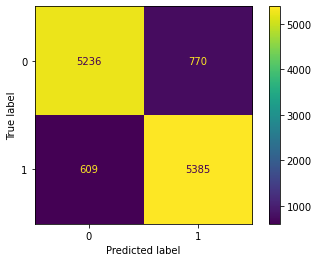

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, Xteste_tfidf, yteste)

Dentre as abordagens testadas, Regressão Logística foi a que obteve melhor resultado, com o préprocessamento realizado utilizando TFIDF.